Морфологические преобразования — это некоторые простые операции, основанные на форме изображения. Обычно они выполняются на бинарных изображениях. Им требуются два входа, один из которых — наше исходное изображение, второй называется структурирующим элементом или ядром , которое определяет характер операции. Два основных морфологических оператора — это Эрозия и Расширение. Затем в игру вступают его вариантные формы, такие как Открытие, Закрытие, Градиент и т. д.


In [11]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [12]:
img_j = '../../image4labs/J.png'
noisy_j = '../../image4labs/noisy_j.png'
j_noise = '../../image4labs/j_noise_inside.png'

In [13]:
def show_orig_and_edit(orig, edit):
    plt.subplot(121), plt.imshow(orig, cmap='gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(edit, cmap='gray')
    plt.title('Edit'), plt.xticks([]), plt.yticks([])
    plt.show()

Эрозия


Ядро проходит по изображению, если **все** пиксели в ядре = 1, то и ядро становится 1, в противном случае оно равно 0.


Все пиксели вблизи границы будут отброшены в зависимости от размера ядра. Таким образом, толщина или размер объекта переднего плана уменьшается или просто уменьшается белая область на изображении. Это полезно для удаления небольших белых шумов, отсоединения двух связанных объектов и т. д.


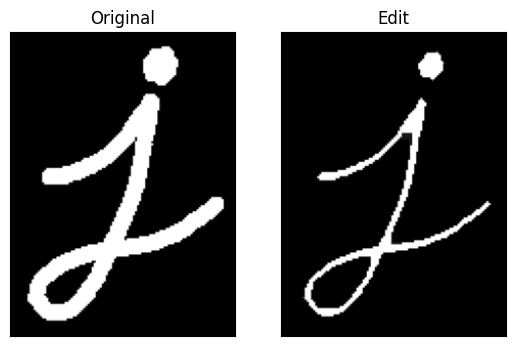

In [14]:
img = cv.imread(img_j, cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
kernel = np.ones((9, 9), np.uint8)
erosion = cv.erode(img, kernel, iterations=1)
show_orig_and_edit(img, erosion)

Расширение


Это полная противоположность эрозии. Здесь элемент пикселя равен «1», если хотя бы один пиксель под ядром равен «1». Таким образом, он увеличивает белую область на изображении или увеличивает размер объекта переднего плана. Обычно, в таких случаях, как удаление шума, за эрозией следует расширение. Потому что эрозия удаляет белые шумы, но также уменьшает наш объект. Поэтому мы расширяем его. Поскольку шум исчез, он не вернется, но площадь нашего объекта увеличивается. Это также полезно для соединения сломанных частей объекта.


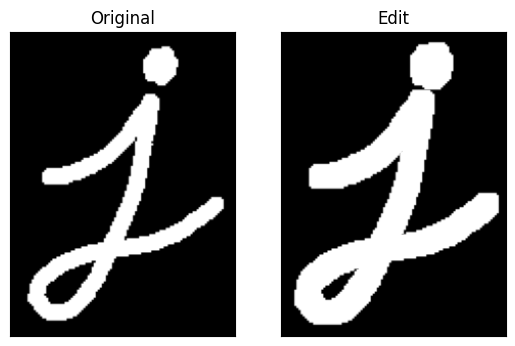

In [15]:
dilation = cv.dilate(img, kernel, iterations=1)
show_orig_and_edit(img, dilation)

Открытие — это просто другое название эрозии, за которой следует расширение . Это полезно для удаления шума, как было объяснено выше.


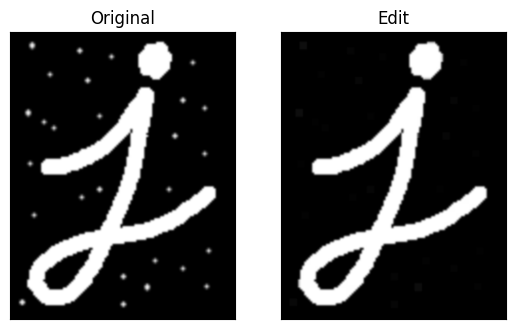

In [23]:
img_noisy = cv.imread(noisy_j, cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

kernel = np.ones((13, 13), np.uint8)
opening = cv.morphologyEx(img_noisy, cv.MORPH_OPEN, kernel)
show_orig_and_edit(img_noisy, opening)

Закрытие — это обратный процесс открытия, расширения, за которым следует эрозия . Это полезно для закрытия небольших отверстий внутри объектов переднего плана или небольших черных точек на объекте.


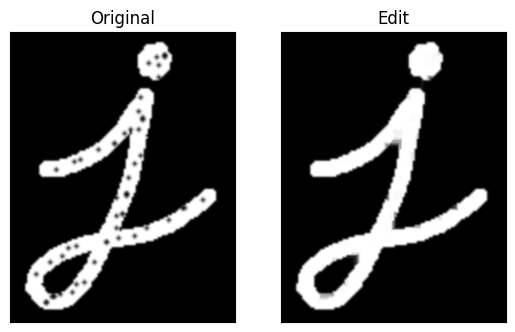

In [ ]:
img_j_noisy = cv.imread(j_noise, cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

kernel = np.ones((15, 15), np.uint8)
closing = cv.morphologyEx(img_j_noisy, cv.MORPH_CLOSE, kernel)
show_orig_and_edit(img_j_noisy, closing)

Морфологический градиент - это разница между расширением и эрозией изображения.

Результат будет похож на контур объекта.


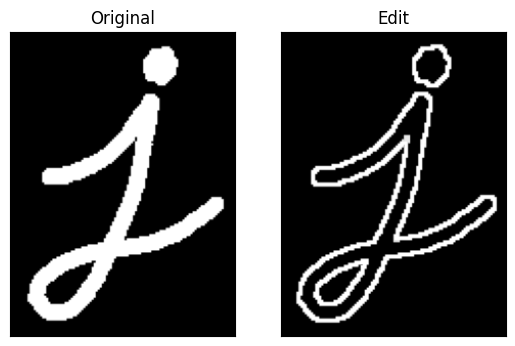

In [ ]:
kernel = np.ones((5, 5), np.uint8)
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)
show_orig_and_edit(img, gradient)

Top hat - это разница между входным изображением и открытием изображения


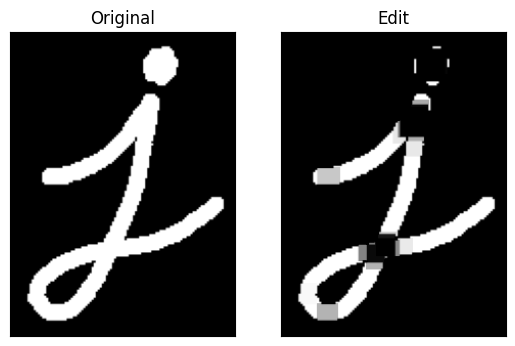

In [30]:
kernel = np.ones((17, 17), np.uint8)
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)
show_orig_and_edit(img, tophat)

Blackhat - это разница между закрытием входного изображения и входным изображением.


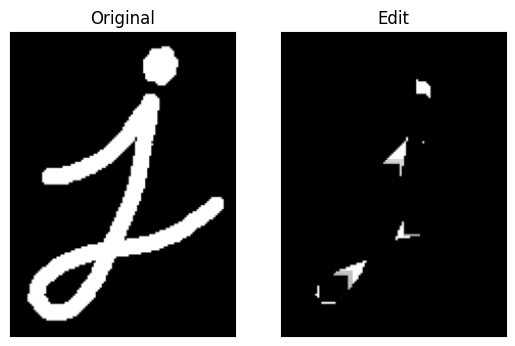

In [34]:
kernel = np.ones((17, 17), np.uint8)
blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)
show_orig_and_edit(img, blackhat)